In [1]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings,scipy
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.special import boxcox1p, boxcox
import scipy.stats as stats 
import statsmodels.api as sm
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [2]:
df=pd.read_csv('loan.csv')

In [3]:
df.shape


(39717, 111)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
df.loan_amnt.isnull().sum()

0

In [ ]:
# Data Cleansing :Missing Value Treatment

In [7]:
nulls = pd.DataFrame((df.isnull().sum()/len(df.index)*100),columns=['null_percent'])
null=nulls.sort_values('null_percent',ascending=False)
df2 = pd.DataFrame(index=nulls.index.copy())
df2[['null_percent']]=nulls[['null_percent']]
df2.sort_values(['null_percent'],ascending=False)

,null_percent
verification_status_joint,100.000000
annual_inc_joint,100.000000
mo_sin_old_rev_tl_op,100.000000
mo_sin_old_il_acct,100.000000
bc_util,100.000000
bc_open_to_buy,100.000000
avg_cur_bal,100.000000
acc_open_past_24mths,100.000000
inq_last_12m,100.000000
total_cu_tl,100.000000


In [8]:
df['loan_status'].value_counts(dropna=False)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [11]:
# How can  we divide the loan_status segment to default and non default
# Binary 0 or 1 


In [9]:
lloans=df

In [10]:
missing_fractions = lloans.isnull().mean().sort_values(ascending=False)
drop_list = sorted(list(missing_fractions[missing_fractions > 0.7].index))
print(len(drop_list))

56


In [11]:
lloans=df.drop(labels=drop_list, axis=1)
print(lloans.shape)

(39717, 55)


In [12]:
lloans['installment'].head()

0    162.87
1     59.83
2     84.33
3    339.31
4     67.79
Name: installment, dtype: float64

<AxesSubplot: xlabel='installment', ylabel='Density'>

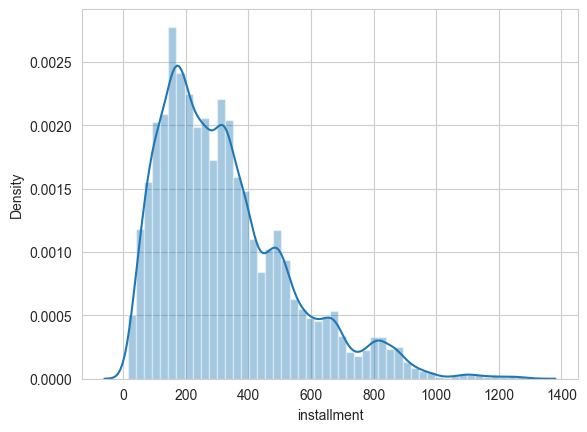

In [13]:
sns.distplot(lloans['installment'])

In [14]:
lloans['installment'].isna().sum()

0

In [15]:
lloans.emp_title.value_counts()

US Army                                                                           134
Bank of America                                                                   109
IBM                                                                                66
AT&T                                                                               59
Kaiser Permanente                                                                  56
Wells Fargo                                                                        54
USAF                                                                               54
UPS                                                                                53
US Air Force                                                                       52
Walmart                                                                            45
Lockheed Martin                                                                    44
United States Air Force                               

In [16]:
lloans['emp_title'].isna().sum()

2459

In [17]:
lloans['emp_title'].fillna("Missing",inplace=True)

In [18]:
lloans['emp_title'].isna().sum()

0

In [19]:
nulls = pd.DataFrame(round(lloans.isnull().sum()/len(lloans.index)*100,2),columns=['null_percent'])
null=nulls.sort_values('null_percent',ascending=False)
df2 = pd.DataFrame(index=nulls.index.copy())
df2[['null_percent']]=nulls[['null_percent']]
df2.sort_values(['null_percent'],ascending=False)

,null_percent
mths_since_last_delinq,64.66
desc,32.58
emp_length,2.71
pub_rec_bankruptcies,1.75
last_pymnt_d,0.18
collections_12_mths_ex_med,0.14
chargeoff_within_12_mths,0.14
revol_util,0.13
tax_liens,0.10
title,0.03


In [20]:
loann=lloans

In [21]:
#Drop Constant Features
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

const_features = find_constant_features(loann)
print(const_features)

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


In [22]:
loann.drop(['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt'],axis=1,inplace=True)

In [23]:
loann.shape

(39717, 49)

In [24]:
#Defining Target Variable

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


loann['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
loann['loan_condition'] = loann['loan_status'].apply(loan_condition)

In [25]:
loann['loan_condition'].value_counts()

Good Loan    34090
Bad Loan      5627
Name: loan_condition, dtype: int64

In [26]:
loann['loan_condition'].value_counts(normalize=True)

Good Loan    0.858323
Bad Loan     0.141677
Name: loan_condition, dtype: float64

In [27]:
loann.shape

(39717, 50)

In [28]:
# Drop Duplicate Records
loann.drop_duplicates(keep='first', inplace=True)

In [29]:
loann.shape

(39717, 50)

In [30]:
data=loann

In [31]:
# Correlation Analysis

corr=data.corr()
index=[]
column=[]
value=[]
for i in range(len(corr.index)):
   for j in range(len(corr.index)):
       #if corr.iloc[i,j] > 0.75  and corr.iloc[i,j] != 1:
        if corr.iloc[i,j] !=1:
           column.append(corr.columns[i])
           index.append(corr.index[j])
           value.append((corr.iloc[i,j]))

In [32]:
corr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,0.117193,0.020388,-0.019440,0.008763,0.042149,0.180619,0.180591,0.140045,0.220838,0.112213,0.172856,-0.055082,0.033426,-0.013359,0.122365,NaN,NaN,-0.009505,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,0.122963,0.017928,-0.018721,0.005113,0.044374,0.170743,0.170706,0.139975,0.229307,0.112168,0.173234,-0.057750,0.031565,-0.015155,0.123627,NaN,NaN,-0.008769,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,0.014871,0.177168,-0.051236,0.317597,0.256442,0.192937,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,NaN,NaN,-0.037180,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,0.016359,0.175530,-0.052169,0.310392,0.250589,0.194941,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,NaN,NaN,-0.038502,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.071924,0.163027,-0.053214,0.290797,0.242854,0.203688,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,NaN,NaN,-0.042746,NaN


In [33]:
correlation=pd.DataFrame({'columns':column,'index':index,'value':value})
correlation

,columns,index,value
0,id,member_id,0.993650
1,id,loan_amnt,0.141919
2,id,funded_amnt,0.152286
3,id,funded_amnt_inv,0.249547
4,id,installment,0.086587
5,id,annual_inc,0.008731
6,id,dti,0.095983
7,id,delinq_2yrs,-0.008644
8,id,inq_last_6mths,-0.042378
9,id,mths_since_last_delinq,0.117193


In [46]:
list_float = data.select_dtypes(exclude=['object']).columns
list_float

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [47]:
list_float=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv']

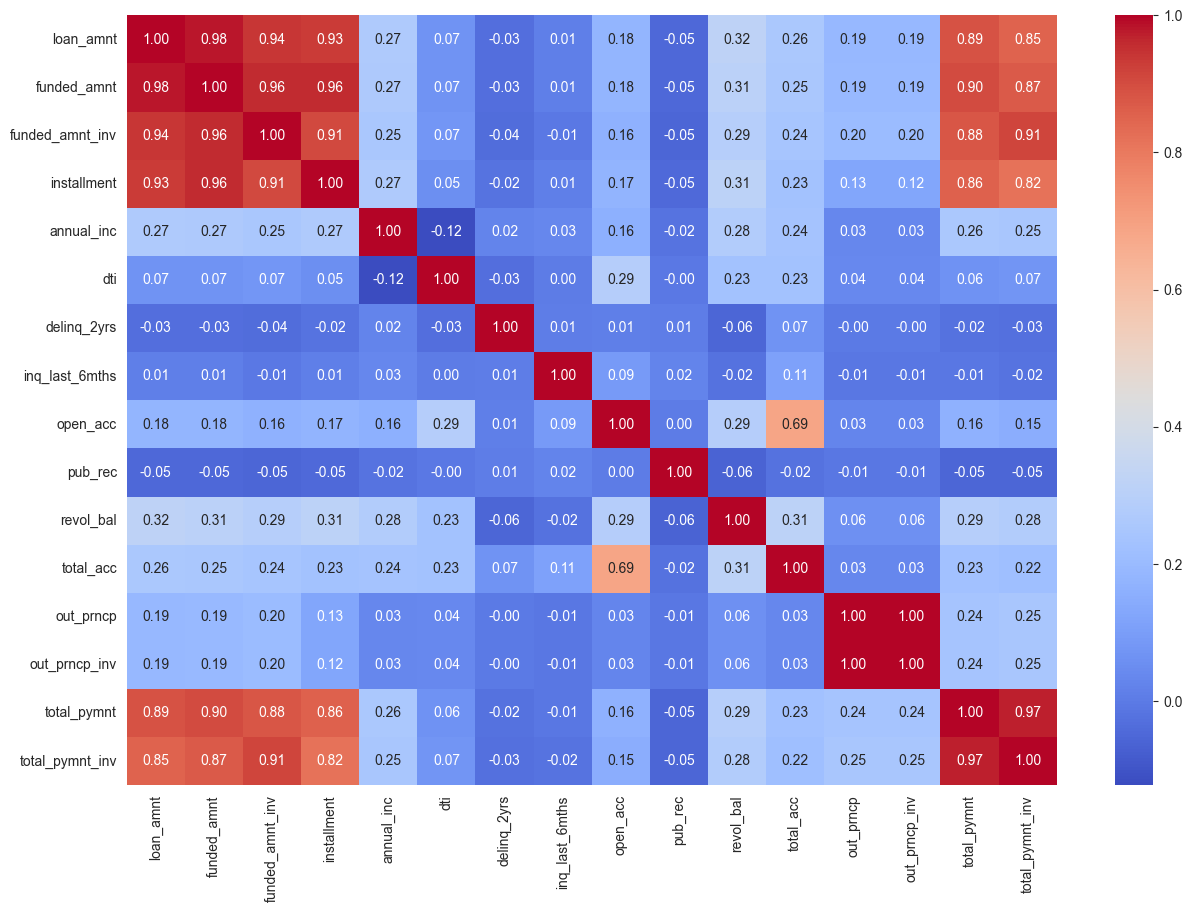

In [48]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = sns.heatmap(df[list_float].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

In [ ]:
# The linearly correlated features are:

#"loan_amount" vs "funded_amount" vs funded_amnt_inv (0.95)
#"open_acc" vs "total_acc" (0.74)
#"installment"* vs "inq_last_6mnths" (0.01)